# Libraries

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from pickle import dump

pd.set_option("display.max.columns",None)
%matplotlib inline

# Data

In [2]:
# Load model
df = pd.read_csv("Dataset Project Mule - Sheet1.csv")
df = df.drop("No",axis=1)
df.head()

,Story_Point,In_Progress_Minutes,Resolution_Time_Minutes,Total_Effort_Minutes
0,1,5947,279352,5947
1,1,1081,280436,1081
2,1,245,289302,245
3,1,56,347139,56
4,1,1082,351211,1082


In [3]:
# Cek null values
df.isnull().sum()

Story_Point                0
In_Progress_Minutes        0
Resolution_Time_Minutes    0
Total_Effort_Minutes       0
dtype: int64

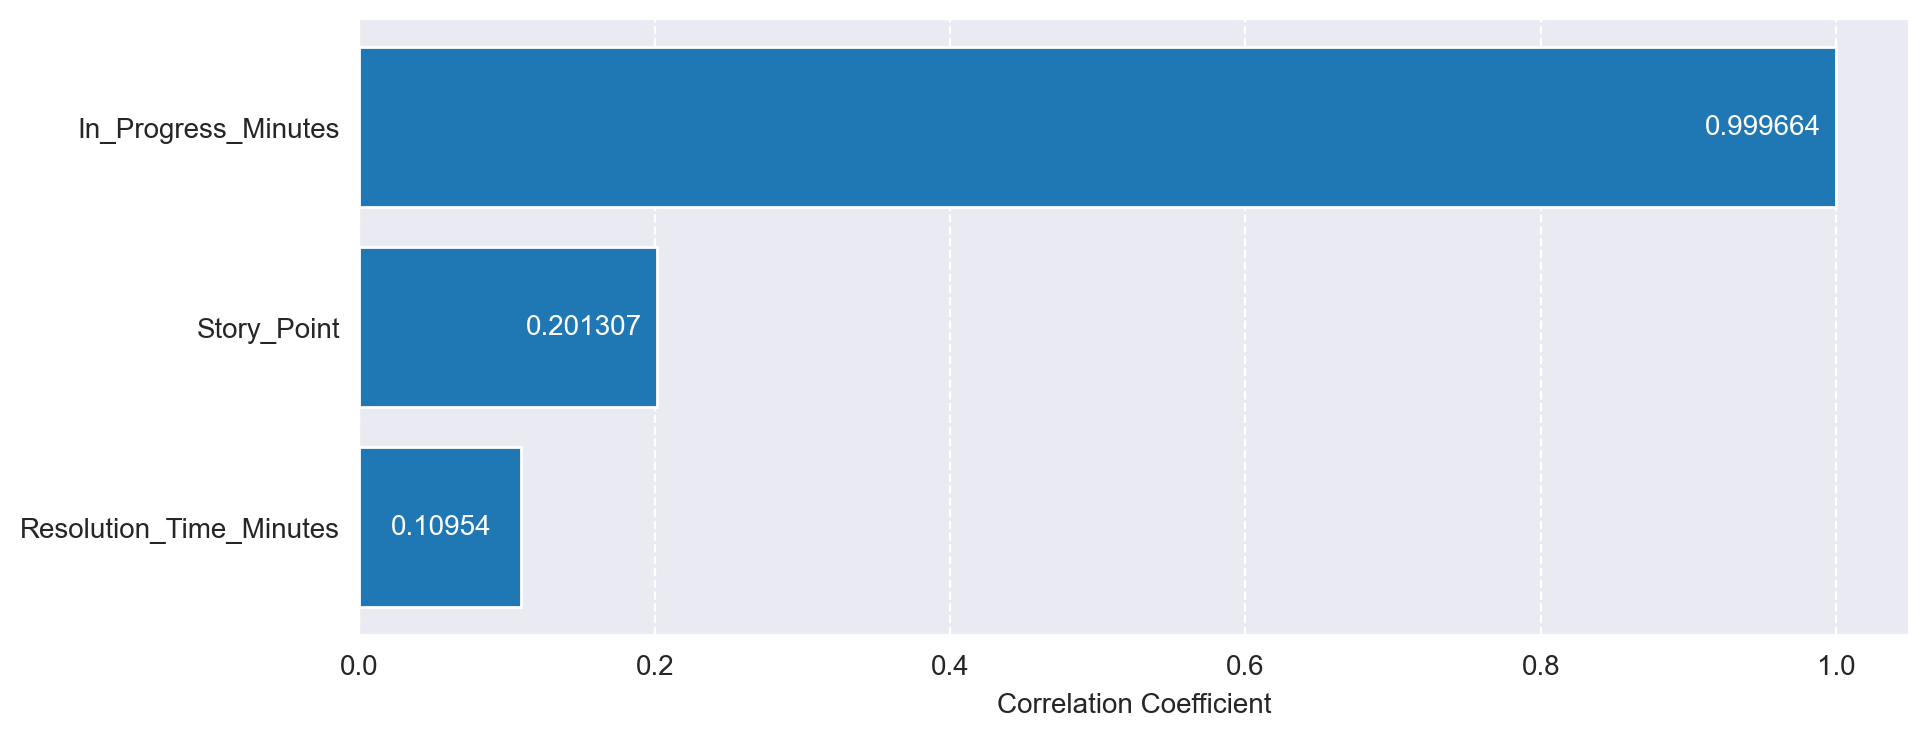

In [4]:
# Menghitung korelasi variabel X terhadap y
with sns.axes_style("dark"):
    fig,ax = plt.subplots(figsize=(10,4),dpi=200)
    bars = ax.barh(
        df.corr()["Total_Effort_Minutes"].iloc[:-1].sort_values().index,
        df.corr()["Total_Effort_Minutes"].iloc[:-1].sort_values().values
    )
    for bars in ax.containers:
        ax.bar_label(bars,padding=-47,color="white")
    ax.set_xlabel("Correlation Coefficient")
    ax.grid(True,which="both",axis="x",ls="--")
    plt.show()

# Train Model

In [5]:
# Mendefenisikan variabel X dan y
X = df.drop("Total_Effort_Minutes",axis=1)
y = df["Total_Effort_Minutes"]

In [6]:
# Split data menjadi training dan testing dengan rasio 70:30
random_state = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=random_state)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 600
Testing dataset		: 258


In [7]:
# Melakukan standarisasi data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [8]:
# Membuat model training
train_model = LinearRegression()
train_model.fit(scaled_X_train,y_train)

LinearRegression()

In [9]:
# Membuat prediksi
train_pred = train_model.predict(scaled_X_test)

In [10]:
# Membandingkan nilai asli dengan prediksi, bisa dilihat keduanya mirip
comparison = pd.DataFrame({"Actual":y_test,"Prediction":train_pred}).reset_index(drop=True)
comparison

,Actual,Prediction
0,5725,5754.843636
1,190,265.209420
2,153,120.718652
3,255,235.860336
4,43,38.018513
...,...,...
253,5373,5416.379316
254,1319,1312.332186
255,47,27.963209
256,32,-0.142909


In [11]:
# Mengevaluasi model training menggunakan beberapa metrik
metrics = pd.DataFrame(
    data=[r2_score(y_test,train_pred),mean_absolute_error(y_test,train_pred),np.sqrt(mean_squared_error(y_test,train_pred))],
    index=["R2","Mean Absolute Error","Root Mean Squared Error"],
    columns=["Metrics"]
)
metrics

,Metrics
R2,0.999967
Mean Absolute Error,30.631354
Root Mean Squared Error,41.048677


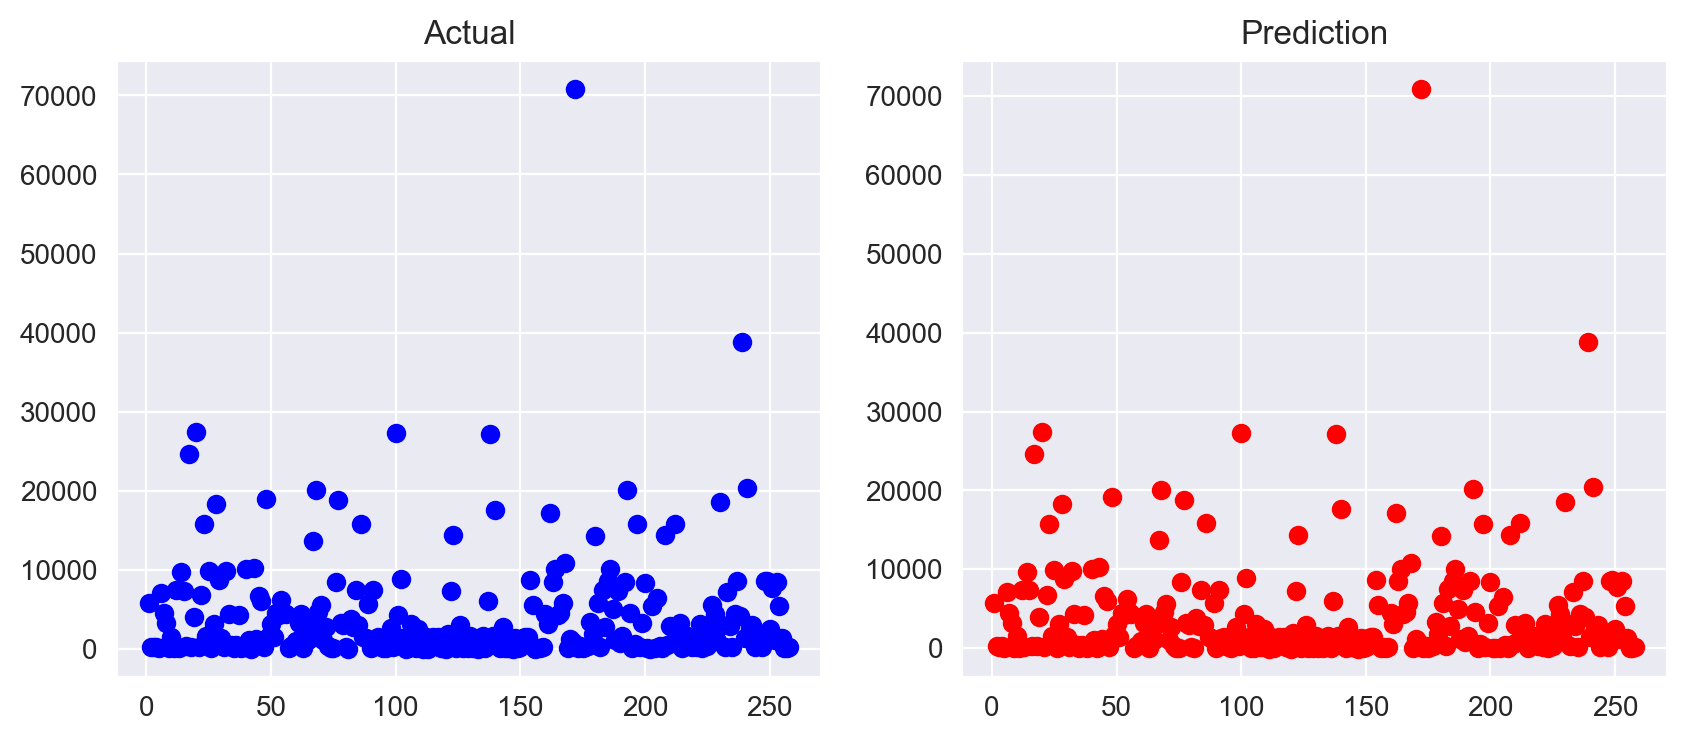

In [12]:
# Memvisualisasikan nilai aktual dengan prediksi, bisa dilihat keduanya sangat mirip yang artinya model training sangat akurat
with sns.axes_style("darkgrid"):
    fig,ax = plt.subplots(figsize=(10,4),dpi=200,ncols=2)
    ax[0].scatter(range(1,len(y_test) + 1),y_test,color="blue")
    ax[0].set_title("Actual")

    ax[1].scatter(range(1,len(y_test) + 1),train_pred,color="red")
    ax[1].set_title("Prediction")
    plt.show()

# Save Model

In [13]:
# Membuat model akhir dengan melatihnya menggunakan seluruh data
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [14]:
# Menuliskan persamaan model
x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]
y_symbol = sp.Symbol("\hat{TotalEffortMinutes}")

sums = np.round(final_model.intercept_,10)
for i in range(len(X.columns)):
    sums += x_symbol[i] * np.round(final_model.coef_[i],10)

sp.Eq(y_symbol,sums)

Eq(\hat{TotalEffortMinutes}, 0.999260135*(InProgressMinutes) + 6.51109e-5*(ResolutionTimeMinutes) + 9.1576993952*(StoryPoint) - 32.239525951)

In [15]:
# Save model dalam bentuk pickle (.pkl)
with open("linear_regression.pkl","wb") as f:
    dump(final_model,f)
print("linear_regression.pkl has been saved")

linear_regression.pkl has been saved
